# Roller coaster project from Codecademy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
roller_coasters = pd.read_csv(r'C:\Users\Lottes\Desktop\roller_coaster_starting\roller_coaster_starting\roller_coasters.csv')
GT_wood = pd.read_csv(r'C:\Users\Lottes\Desktop\roller_coaster_starting\roller_coaster_starting\Golden_Ticket_Award_Winners_Wood.csv')
GT_steel = pd.read_csv(r'C:\Users\Lottes\Desktop\roller_coaster_starting\roller_coaster_starting\Golden_Ticket_Award_Winners_Steel.csv')

Function to plot rankings of 1 roller coaster

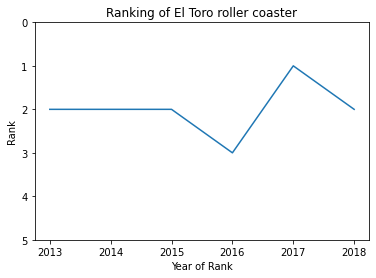

In [3]:
#eltoro=GT_wood[GT_wood['Name']== 'El Toro']
def Roller_plot(name, df, location):
    df1 = df[(df['Name']==name) & (df['Location']==location)]                          
    ax=plt.subplot()
    ax.set_xlabel('Year of Rank')
    ax.set_ylabel('Rank')
    plt.ylim(5,0)
    plt.title('Ranking of ' + str(name) + ' roller coaster')
    plt.plot(df1['Year of Rank'], df1['Rank'])
    return(plt.show())
    
    

Roller_plot('El Toro', GT_wood, 'Jackson, N.J.')


Function to plot multiple coasters 

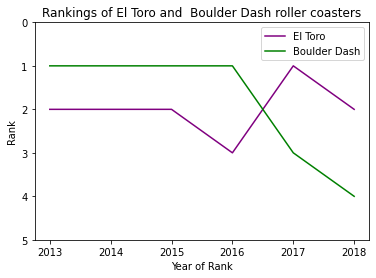

In [4]:
def Roller_plot_two(name, name2, df, location, location2):
    df1 = df[(df['Name']==name) & (df['Location']==location)]
    df2 = df[(df['Name']==name2) & (df['Location']==location2)]
    ax=plt.subplot()
    ax.set_xlabel('Year of Rank')
    ax.set_ylabel('Rank')
    plt.ylim(5,0)
    plt.title('Rankings of ' + str(name) + ' and  ' + str(name2) + ' roller coasters')
    plt.plot(df1['Year of Rank'], df1['Rank'], color='purple')
    plt.plot(df2['Year of Rank'], df2['Rank'], color='green')
    labels = [name, name2]
    plt.legend(labels)
    return(plt.show())
    
    

Roller_plot_two('El Toro', 'Boulder Dash', GT_wood, 'Jackson, N.J.', 'Bristol, Conn.')


Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. Your function should take a number n and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

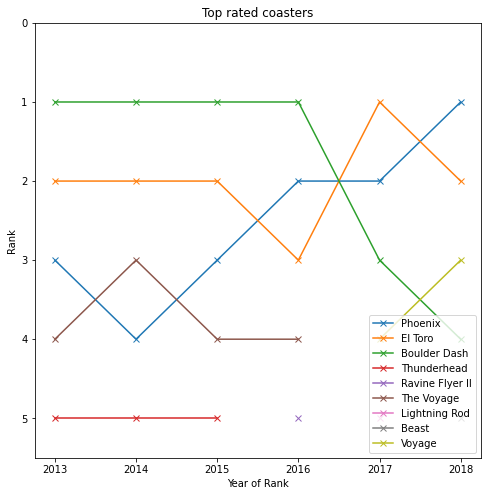

None


In [5]:
def ranking_plot(n, df):
    dfe = df[(df['Rank'] <=5)]
    fig, ax=plt.subplots(figsize=(8,8))
    for coaster in set(dfe['Name']):
        coaster_rankings = dfe[dfe['Name']==coaster]
        ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'], label=coaster, marker = 'x')
        ax.legend(loc=4)
    ax.set_xlabel('Year of Rank')
    ax.set_ylabel('Rank')
    plt.title('Top rated coasters')
    plt.ylim(5.5, 0, 1)
    
    return plt.show()
    
print(ranking_plot(5, GT_wood))

In [98]:
#print(roller_coasters.head())

Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and one of the column names.

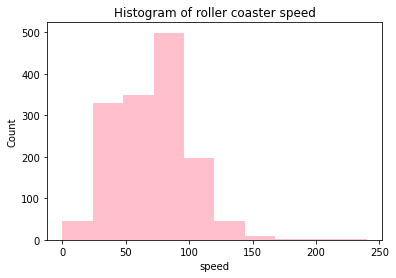

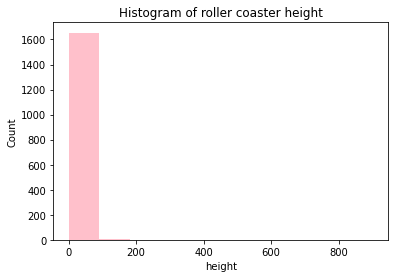

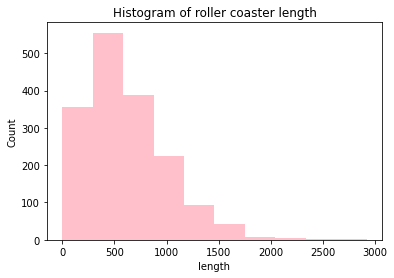

In [7]:
def plot_hist(df, column):
    plt.clf()
    plt.hist(df[column], color='pink')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Histogram of roller coaster ' + str(column))
    return plt.show()

plot_hist(roller_coasters, 'speed')
plot_hist(roller_coasters, 'height')
plot_hist(roller_coasters, 'length')

Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and an amusement park name.

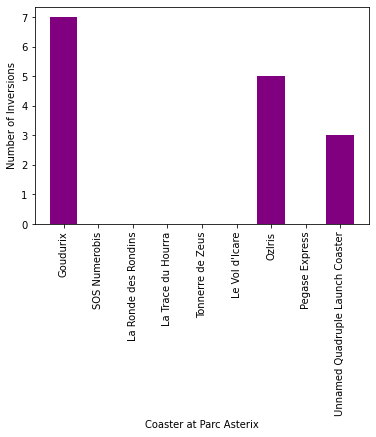

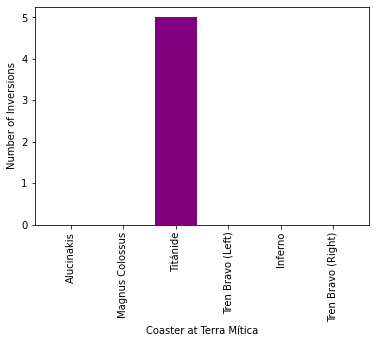

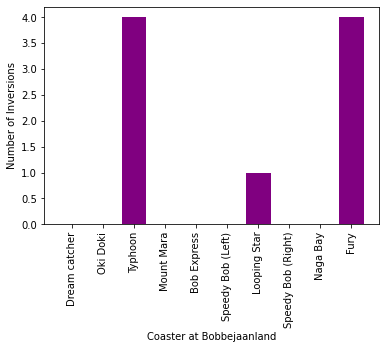

In [8]:
def num_inversions(park, df):
    df_park = df[df['park']==park]
    plt.clf()
    plt.bar(df_park['name'], df_park['num_inversions'], color='purple')
    plt.xlabel('Coaster at ' + str(park))
    plt.ylabel('Number of Inversions')
    plt.xticks(rotation=90)
    return plt.show()

num_inversions('Parc Asterix', roller_coasters)
num_inversions('Terra Mítica', roller_coasters)
num_inversions('Bobbejaanland', roller_coasters)


Write a function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely'). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame.

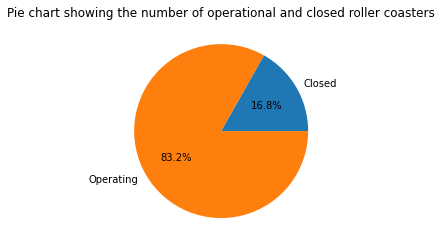

None


In [9]:
def pie_coaster(df):
    df_op = df[df['status']=='status.operating']
    df_close = df[df['status']=='status.closed.definitely']
    my_labels = 'Closed', 'Operating'
    data = [((len(df_close)) / (len(df_close) + len(df_op))), ((len(df_op)) / (len(df_close) + len(df_op)))]
    plt.pie(data, labels=my_labels, autopct='%1.1f%%')
    plt.title('Pie chart showing the number of operational and closed roller coasters')
    return plt.show()
print(pie_coaster(roller_coasters))

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and two-column names.

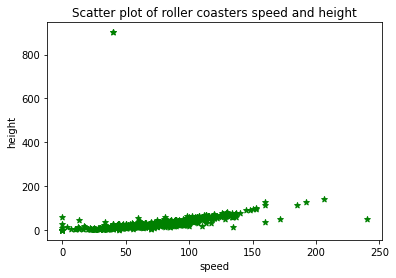

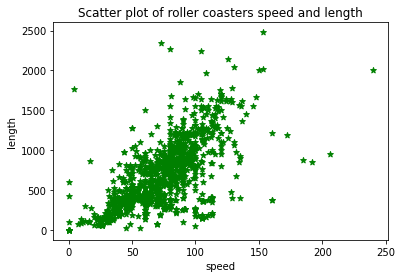

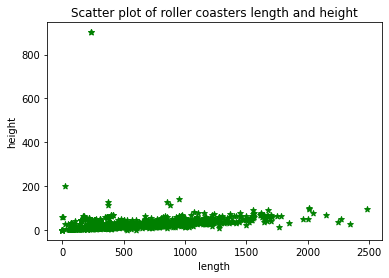

In [10]:
def plot_scatter(df, column1, column2):
    plt.clf()
    plt.scatter(df[column1], df[column2], color='green', marker='*')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title('Scatter plot of roller coasters ' + str(column1) + ' and ' + str(column2))
    return plt.show()

plot_scatter(roller_coasters, 'speed', 'height')
plot_scatter(roller_coasters, 'speed', 'length')
plot_scatter(roller_coasters, 'length', 'height')

What roller coaster seating type is most popular? 

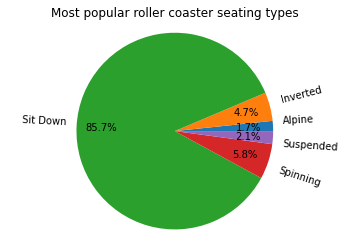

In [11]:
def pop_seat_types(df):
    seating_types = df.groupby('seating_type').size().reset_index()
    seating_types.rename(columns={0:'count'}, inplace=True)
    seating_types = seating_types[seating_types['count'] > 40]
    plt.pie(seating_types['count'], autopct='%1.1f%%', labels= seating_types['seating_type'], rotatelabels=True, pctdistance=0.75)
    plt.title('Most popular roller coaster seating types')
    plt.axis('equal')
    return plt.show()

pop_seat_types(roller_coasters)

Do different seating types result in higher/faster/longer roller coasters?


Do amusement parks have any specialties?

In [12]:
#count = (roller_coasters['speed'] == 0).sum()
#countNAN = roller_coasters['speed'].isna().sum(axis=0)
#print(countNAN)
#print(count)
#There are 0 and null values in the table, so these will need removed in the function below


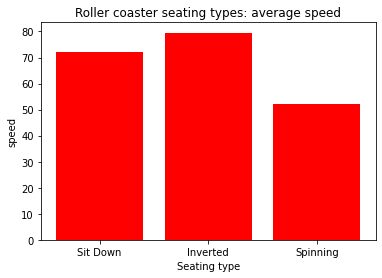

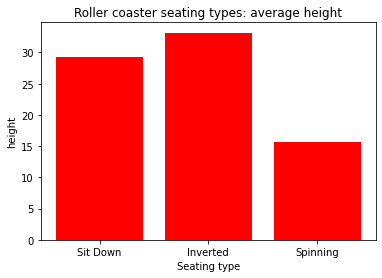

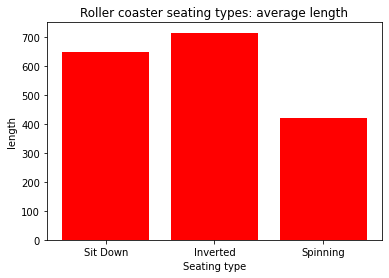

In [13]:
def seating_data_averages(df, column):
    category = ('Sit Down', 'Inverted', 'Spinning')
    sit_down_df = df[(df['seating_type'] == 'Sit Down') & df[column] != 0].dropna().reset_index()
    inverted_df = df[(df['seating_type'] == 'Inverted') & df[column] != 0].dropna().reset_index()
    spinning_df = df[(df['seating_type'] == 'Spinning') & df[column] != 0].dropna().reset_index()
    ax = plt.subplot()
    plt.bar(range(3), [sit_down_df[column].mean(), inverted_df[column].mean(), spinning_df[column].mean()], color='red')
    ax.set_xticks(range(3))
    ax.set_xticklabels(category)
    plt.title('Roller coaster seating types: average ' + str(column))
    plt.xlabel('Seating type')
    plt.ylabel(column)
    return plt.show()

seating_data_averages(roller_coasters, 'speed')
seating_data_averages(roller_coasters, 'height')
seating_data_averages(roller_coasters, 'length')
#seating_data_averages(roller_coasters, 'num_inversions')

Do roller coaster manufacturers have any specialties (do they focus on speed, height, seating type, or inversions)?

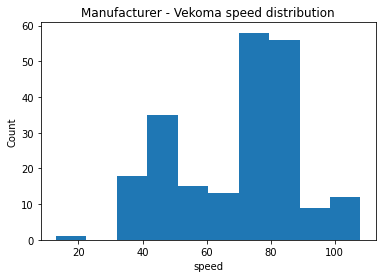

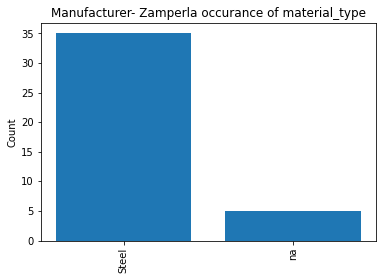

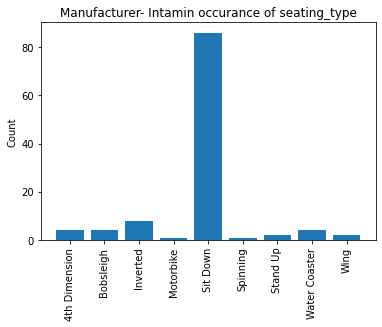

Try a different category


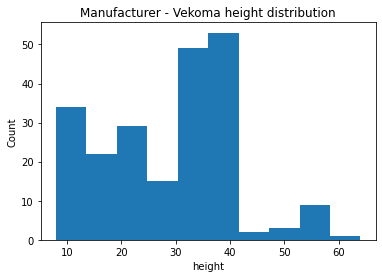

Try a different category


In [97]:
#print(roller_coasters.head())
#print(roller_coasters['manufacturer'].value_counts())

def manufact_special(df, manufacturer, column):
  if column == 'seating_type':
    manf_df = df[(df['manufacturer'] == manufacturer) & (df[column])].dropna()
    special_df = manf_df.groupby(column).size().reset_index()
    special_df.rename(columns={0:'count'}, inplace=True)
    plt.clf()
    ax = plt.subplot()
    plt.bar(special_df[column], special_df['count'])
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title('Manufacturer- ' + str(manufacturer) + ' occurance of ' + str(column))
    plt.show()
    
  if column == 'material_type':
    manf_df = df[(df['manufacturer'] == manufacturer) & (df[column])].dropna()
    special_df = manf_df.groupby(column).size().reset_index()
    special_df.rename(columns={0:'count'}, inplace=True)
    plt.clf()
    ax = plt.subplot()
    plt.bar(special_df[column], special_df['count'])
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title('Manufacturer- ' + str(manufacturer) + ' occurance of ' + str(column))
    plt.show()
    
  elif column == 'speed':
    manf_df = df[(df['manufacturer'] == manufacturer) & (df[column])].dropna()
    plt.clf()
    ax = plt.subplot()
    plt.hist(manf_df[column])
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.title('Manufacturer - ' + str(manufacturer) + ' ' + str(column) + ' distribution')
    plt.show()
    
  elif column == 'height':
    manf_df = df[(df['manufacturer'] == manufacturer) & (df[column])].dropna()
    plt.clf()
    ax = plt.subplot()
    plt.hist(manf_df[column])
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.title('Manufacturer - ' + str(manufacturer) + ' ' + str(column) + ' distribution')
    plt.show()

  else:
    print("Try a different category")
    
    
manufact_special(roller_coasters, 'Vekoma', 'speed')
manufact_special(roller_coasters, 'Zamperla', 'material_type')
manufact_special(roller_coasters, 'Intamin', 'seating_type')
manufact_special(roller_coasters, 'Vekoma', 'height')
manufact_special(roller_coasters, 'Vekoma', 'num_inversions')